In [1]:
from FlagEmbedding import FlagModel
import numpy as np
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from pprint import pprint as pp
import time
import umap
import os

In [12]:
import time
from contextlib import contextmanager

@contextmanager
def timer():
    start_time = time.time()
    try:
        yield
    finally:
        end_time = time.time()
        print(f"Elapsed time: {end_time - start_time:.4f} seconds")

In [10]:
model = FlagModel('BAAI/bge-large-en-v1.5', 
                  query_instruction_for_retrieval="",
                  use_fp16=True)

----------using 8*GPUs----------


In [11]:
from datasets import load_dataset, load_from_disk

# random

In [11]:
root = "/mnt/bn/data-tns-live-llm/leon/datasets/fed_data/"
datas = []
for i in range(10):
    datas.append(load_from_disk(f"{root}/random_with_base_{i}"))

In [12]:
print(datas[0])

Dataset({
    features: ['instruction', 'response', 'label', '__index_level_0__'],
    num_rows: 5100
})


In [13]:
embeddings = model.encode(datas[0]["instruction"])

Inference Embeddings: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]


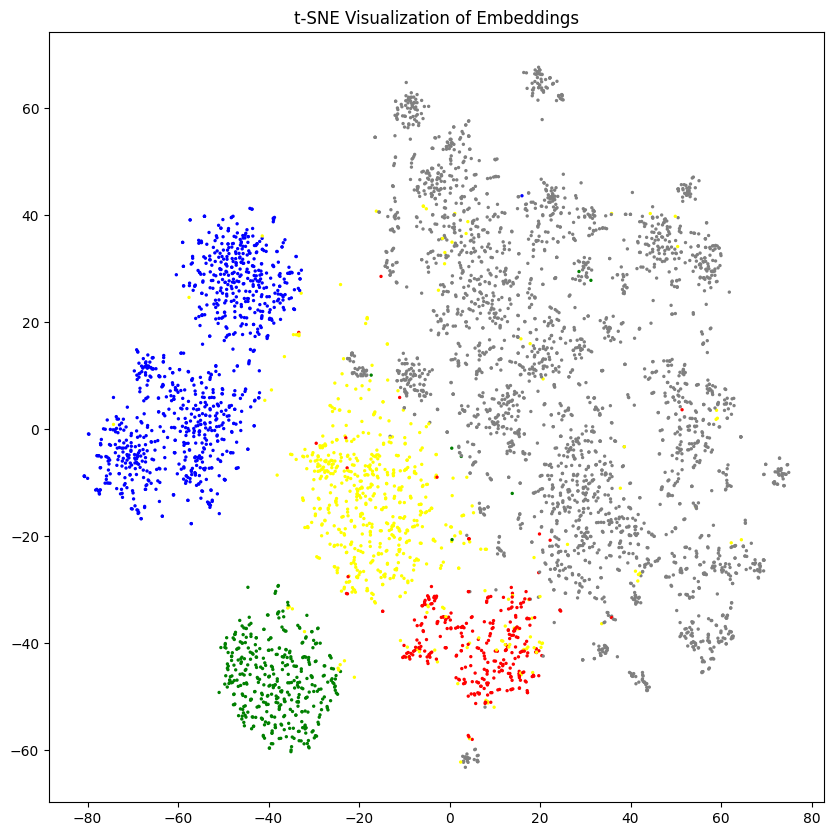

In [14]:
tsne_model = TSNE(n_components=2, random_state=0, metric='cosine')
tsne_results = tsne_model.fit_transform(embeddings)
colors = ["red","blue","green","yellow","grey"]
color_dict = {"code":"red","fin":"blue","med":"green","gen":"yellow","math":"grey"}
colors_list = [color_dict[label] for label in datas[0]["label"]]
plt.figure(figsize=(10, 10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors_list, s=2)
plt.title('t-SNE Visualization of Embeddings')
plt.show()

# pos

Inference Embeddings: 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]


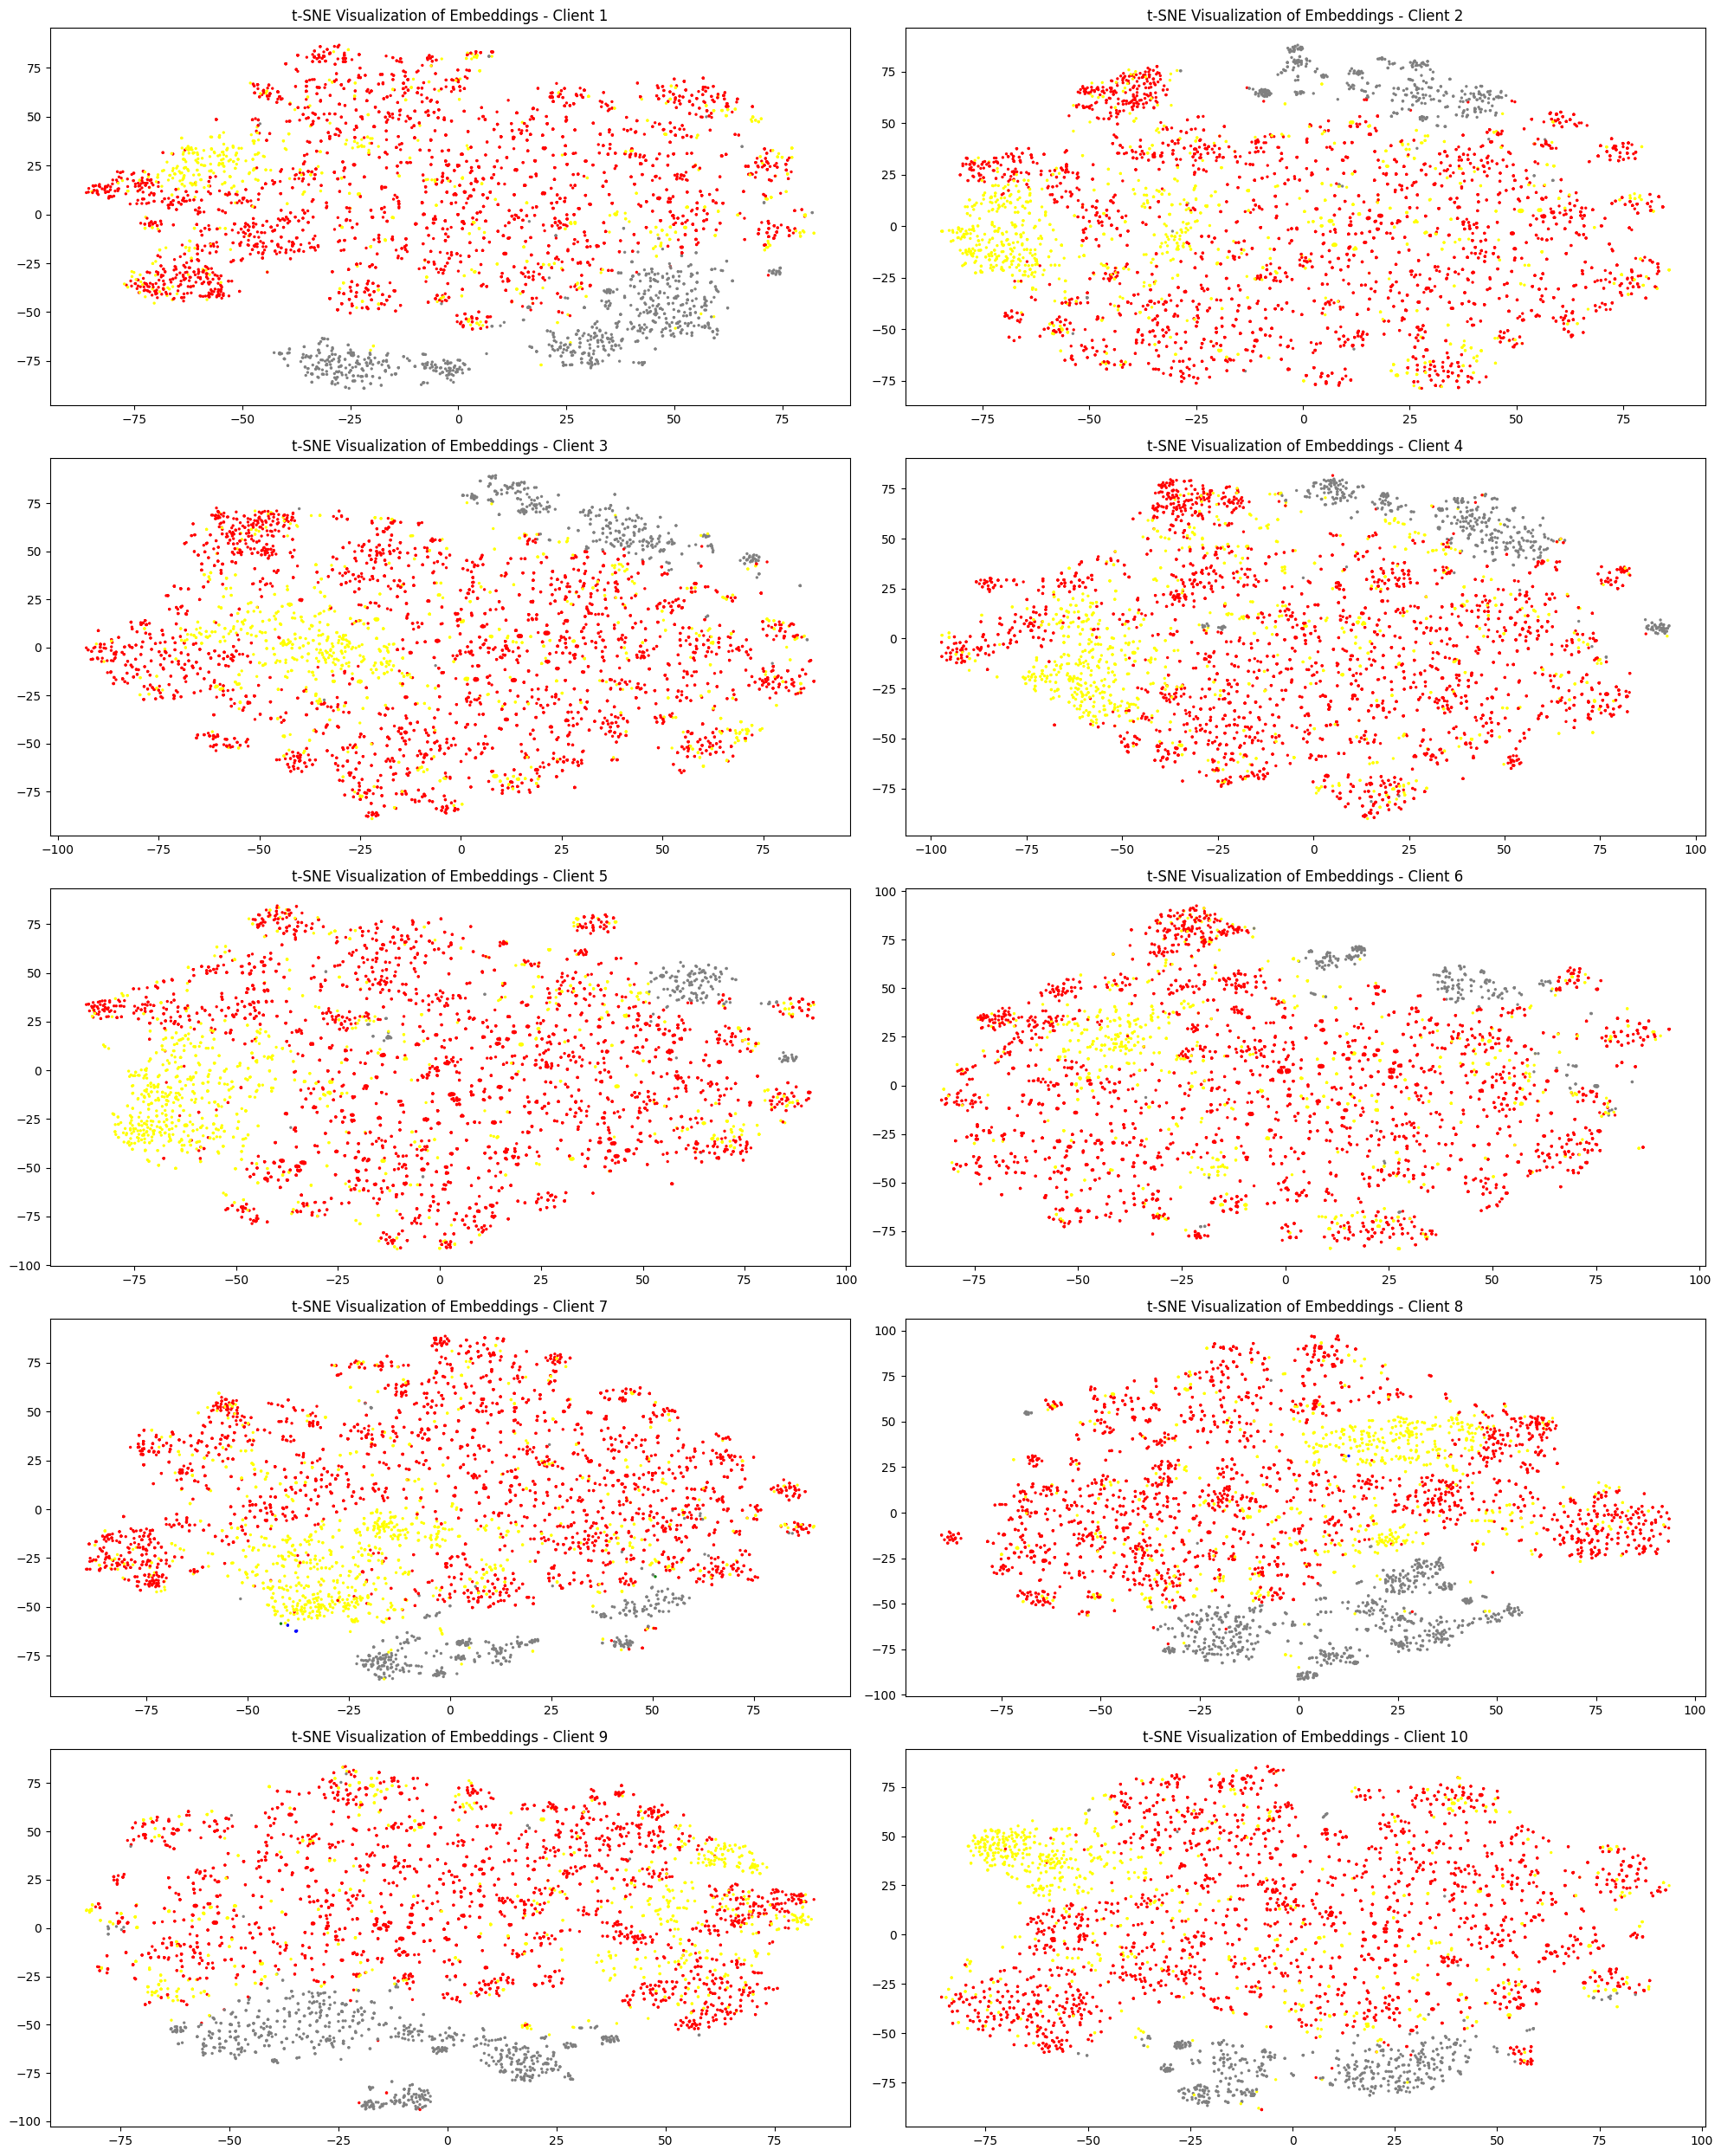

: 

In [17]:
root = "/mnt/bn/data-tns-live-llm/leon/datasets/fed_data/"
datas = []
for i in range(10):
    datas.append(load_from_disk(f"{root}/pos_{i}"))

# 创建一个 2x5 的绘图网格
fig, axs = plt.subplots(5, 2, figsize=(20, 25))

# 遍历数据并进行 t-SNE 可视化
for i, data in enumerate(datas):
    embeddings = model.encode(data["instruction"])
    tsne_model = TSNE(n_components=2, random_state=0, metric='cosine')
    tsne_results = tsne_model.fit_transform(embeddings)
    # 获取颜色列表
    colors_list = [color_dict[label] for label in data["label"]]
    # 计算子图位置
    row = i // 2
    col = i % 2
    # 在对应的子图中绘制散点图
    axs[row, col].scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors_list, s=2)
    axs[row, col].set_title(f't-SNE Visualization of Embeddings - Client {i+1}')
# 调整子图间距
plt.tight_layout()

# 展示所有子图
plt.show()

Inference Embeddings: 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]
/home/tiger/.local/lib/python3.9/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


<Figure size 640x480 with 0 Axes>

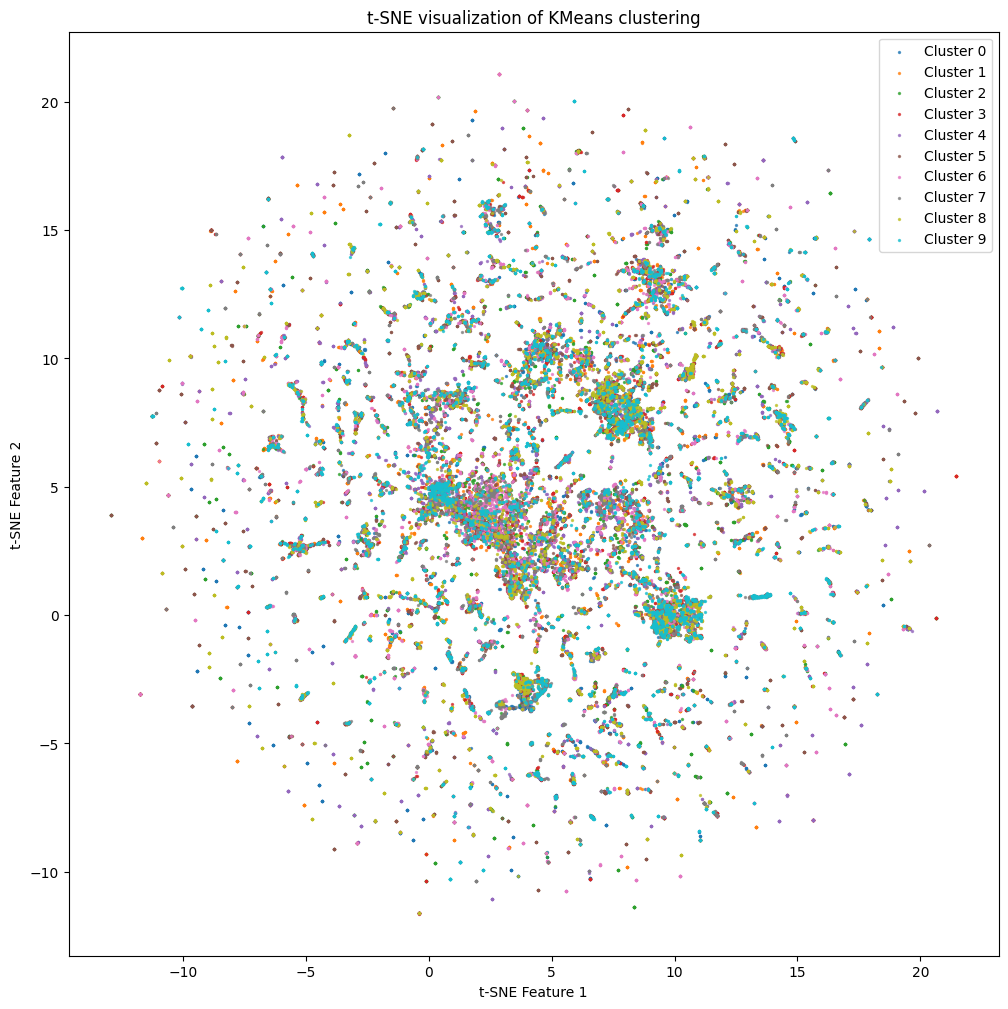

In [30]:
root = "/mnt/bn/data-tns-live-llm/leon/datasets/fed_data/"
datas = []
for i in range(10):
    datas.append(load_from_disk(f"{root}/pos_{i}.parquet"))

# 遍历数据并进行 t-SNE 可视化
embeddings = []
labels = []
for i, data in enumerate(datas):
    embedding = model.encode(data["instruction"])
    embeddings.extend(embedding)
    labels.extend([i]*len(embedding))

embeddings = np.array(embeddings)
labels = np.array(labels)
umap_model = umap.UMAP(n_components=2, metric='cosine')
umap_results = umap_model.fit_transform(embeddings)
# 调整子图间距
plt.tight_layout()
# 展示所有子图
plt.show()

plt.figure(figsize=(12, 12))
for i in range(10):
    # 选择属于当前簇的点
    points = umap_results[labels == i]
    # 绘制这些点，并用不同的颜色进行区分
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}', s=2, alpha=0.7)

plt.title('t-SNE visualization of KMeans clustering')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

# niid pos

Inference Embeddings: 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]
/home/tiger/.local/lib/python3.9/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


<Figure size 640x480 with 0 Axes>

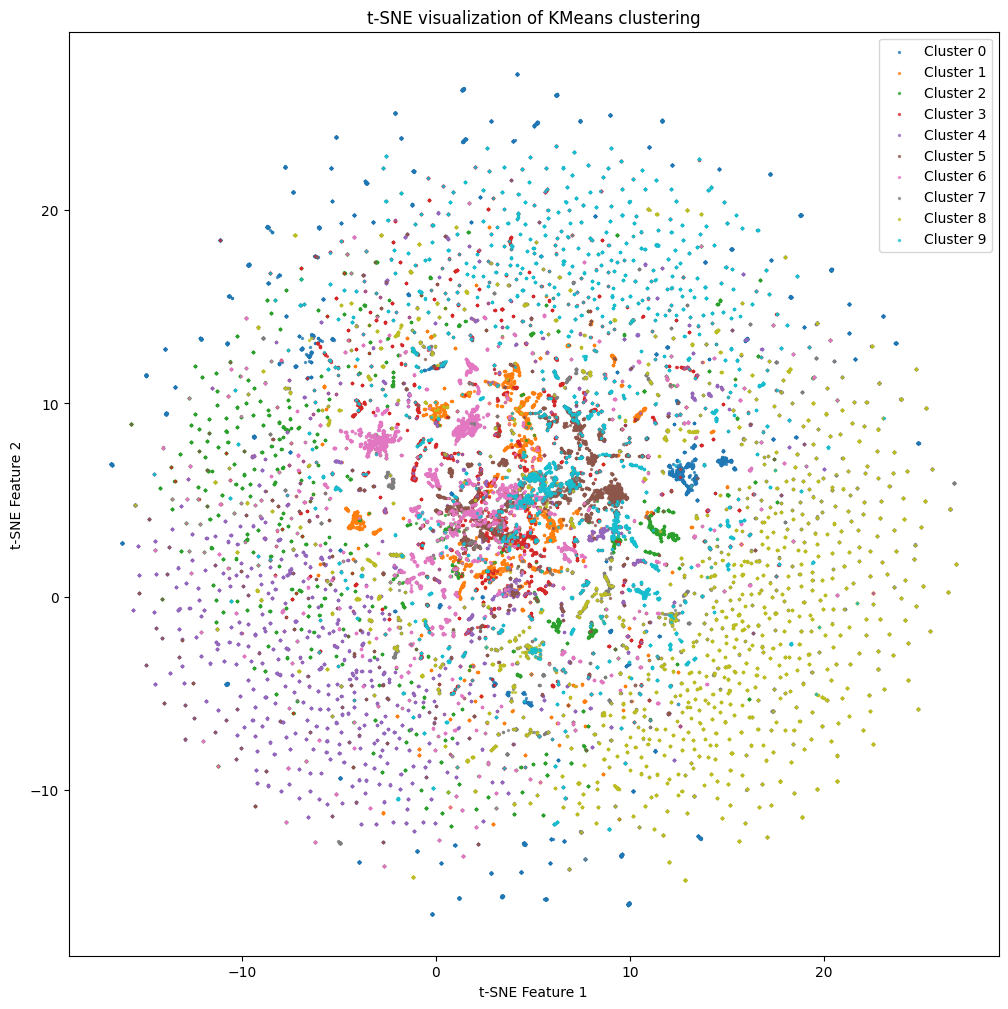

In [47]:
root = "/mnt/bn/data-tns-live-llm/leon/datasets/fed_data/"
datas = []
for i in range(10):
    datas.append(load_from_disk(f"{root}/niid_pos_{i}.parquet"))

# 遍历数据并进行 t-SNE 可视化
embeddings = []
labels = []
for i, data in enumerate(datas):
    embedding = model.encode(data["instruction"])
    embeddings.extend(embedding)
    labels.extend([i]*len(embedding))

embeddings = np.array(embeddings)
labels = np.array(labels)
# tsne_model = TSNE(n_components=2, random_state=0, metric='cosine')
# tsne_results = tsne_model.fit_transform(embeddings)
umap_model = umap.UMAP(n_components=2, metric='cosine')
umap_results = umap_model.fit_transform(embeddings)
# 调整子图间距
plt.tight_layout()
# 展示所有子图
plt.show()

plt.figure(figsize=(12, 12))
for i in range(10):
    # 选择属于当前簇的点
    points = umap_results[labels == i]
    # 绘制这些点，并用不同的颜色进行区分
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}', s=2, alpha=0.7)

plt.title('t-SNE visualization of KMeans clustering')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

Inference Embeddings: 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]
/home/tiger/.local/lib/python3.9/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/tiger/.local/lib/python3.9/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/tiger/.local/lib/python3.9/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/tiger/.local/lib/python3.9/site-packages/umap/spectral.py:5

<Figure size 640x480 with 0 Axes>

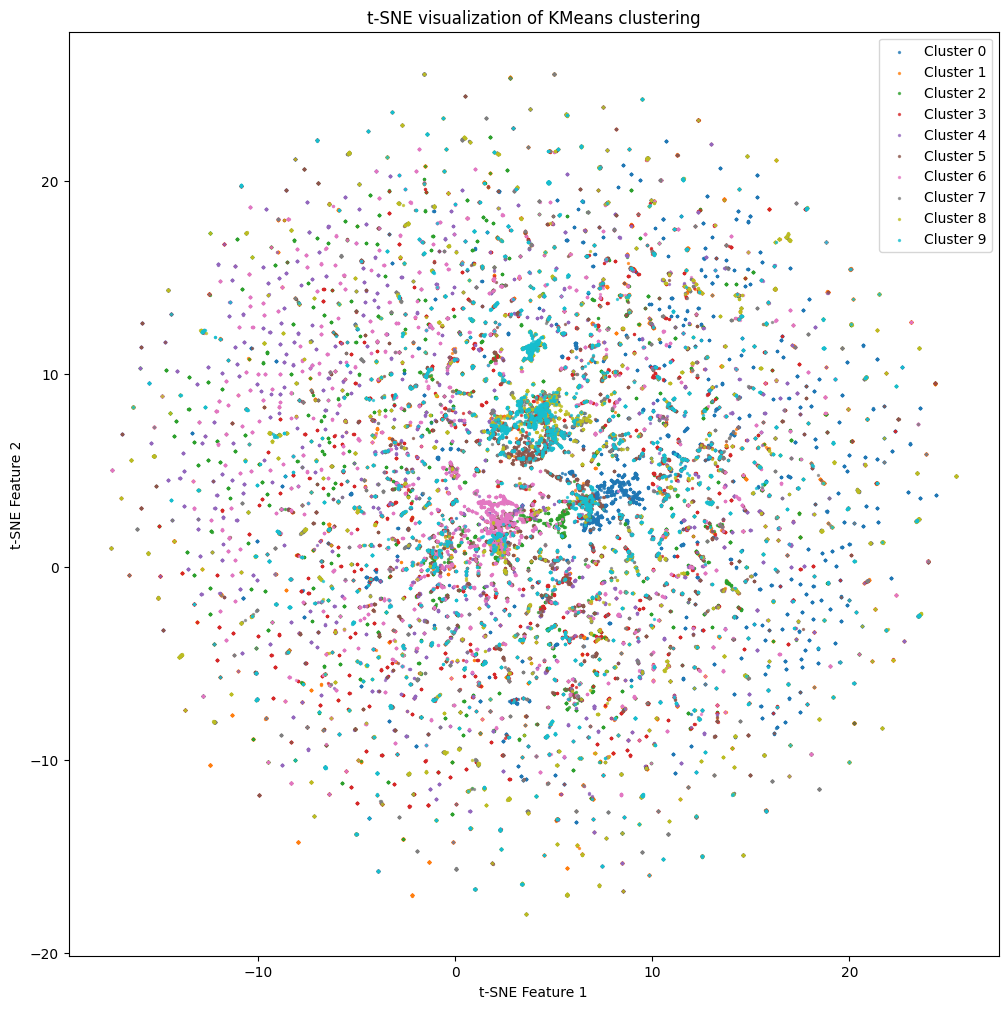

In [53]:
root = "/mnt/bn/data-tns-live-llm/leon/datasets/fed_data/"
datas = []
for i in range(10):
    datas.append(load_from_disk(f"{root}/niid_pos_sharded_{i}.parquet"))

# 遍历数据并进行 t-SNE 可视化
embeddings = []
labels = []
for i, data in enumerate(datas):
    embedding = model.encode(data["instruction"])
    embeddings.extend(embedding)
    labels.extend([i]*len(embedding))

embeddings = np.array(embeddings)
labels = np.array(labels)
# tsne_model = TSNE(n_components=2, random_state=0, metric='cosine')
# tsne_results = tsne_model.fit_transform(embeddings)
umap_model = umap.UMAP(n_components=2, metric='cosine')
umap_results = umap_model.fit_transform(embeddings)
# 调整子图间距
plt.tight_layout()
# 展示所有子图
plt.show()

plt.figure(figsize=(12, 12))
for i in range(10):
    # 选择属于当前簇的点
    points = umap_results[labels == i]
    # 绘制这些点，并用不同的颜色进行区分
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}', s=2, alpha=0.7)

plt.title('t-SNE visualization of KMeans clustering')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

# neg

Inference Embeddings: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]


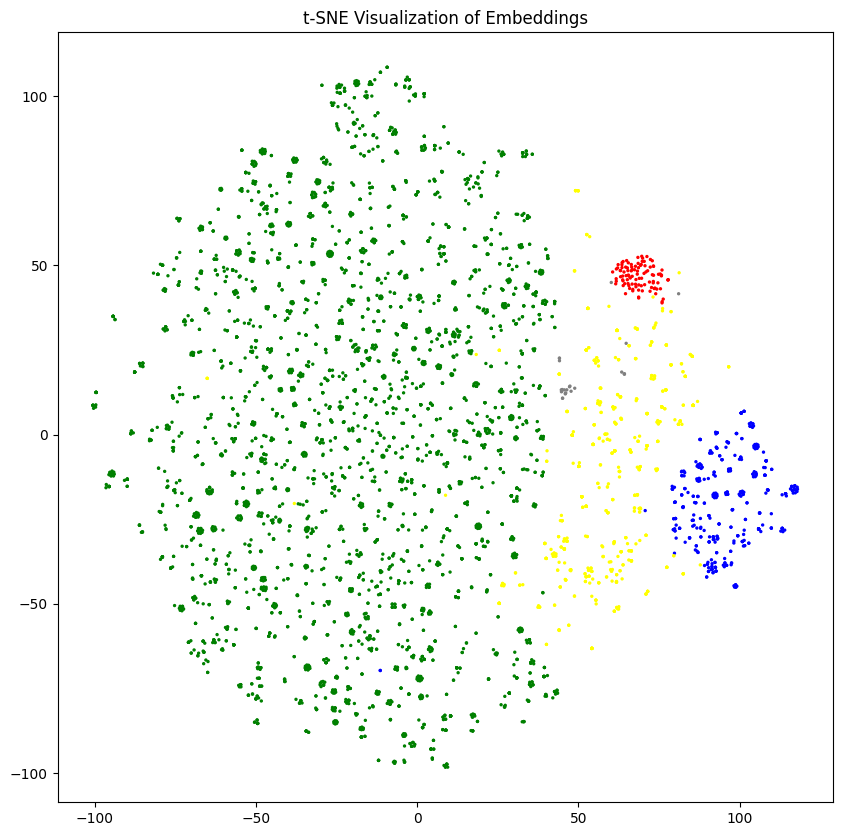

In [16]:
root = "/mnt/bn/data-tns-live-llm/leon/datasets/fed_data/"
datas = []
for i in range(10):
    datas.append(load_from_disk(f"{root}/neg_{i}"))
embeddings = model.encode(datas[0]["instruction"])
tsne_model = TSNE(n_components=2, random_state=0, metric='cosine')
tsne_results = tsne_model.fit_transform(embeddings)
colors = ["red","blue","green","yellow","grey"]
color_dict = {"code":"red","fin":"blue","med":"green","gen":"yellow","math":"grey"}
colors_list = [color_dict[label] for label in datas[0]["label"]]
plt.figure(figsize=(10, 10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors_list, s=2)
plt.title('t-SNE Visualization of Embeddings')
plt.show()

# 构造non-iid base 数据集，然后进行 niid 的检索

In [2]:
from datasets import load_dataset, concatenate_datasets, load_from_disk
import pandas as pd
import datasets
from datasets import Dataset
from pprint import pprint as pp
from datasets import Dataset
from sklearn.cluster import KMeans
from tqdm import tqdm
import torch
import heapq

In [3]:
code_data = load_dataset("sahil2801/CodeAlpaca-20k")["train"]
fin_data = load_dataset("FinGPT/fingpt-sentiment-train")["train"]
med_data = load_dataset("medalpaca/medical_meadow_medical_flashcards")["train"]
# general_data = load_dataset("tatsu-lab/alpaca")["train"]
math_data = load_dataset("TIGER-Lab/MathInstruct")["train"]

In [4]:
def alpaca_format(example):
    if example['input'] == "":
        example["instruction"] = example["instruction"]
    else:
        example["instruction"] = example["instruction"] + " " + example['input']
    example["response"] = example['output']
    return example

In [5]:
def process_sft_dataset(dataset_name, dataset, dataset_sample=None)->datasets.Dataset:
    if dataset_name in ["lucasmccabe-lmi/CodeAlpaca-20k", "yahma/alpaca-cleaned", "FinGPT/fingpt-sentiment-train"]:
        dataset = dataset.map(alpaca_format, remove_columns=['input', 'output'], desc=f"Preprocessing {dataset_name} for unified format.")
    elif dataset_name in ["WizardLM/WizardLM_evol_instruct_70k"]:
        dataset = dataset.rename_column("output", "response")
    elif dataset_name in ["tatsu-lab/alpaca", "vicgalle/alpaca-gpt4", "gbharti/finance-alpaca"]:
        dataset = dataset.map(alpaca_format, remove_columns=['input', 'output', 'text'], desc=f"Preprocessing {dataset_name} for unified format.")
    elif dataset_name in ["TIGER-Lab/MathInstruct"]:
        df = pd.DataFrame(dataset)
        df = df.drop_duplicates(subset=['instruction'])
        dataset = datasets.Dataset.from_pandas(df)
        dataset = dataset.rename_column("output", "response")
        dataset = dataset.remove_columns(['source'])
    elif dataset_name in ["lighteval/MATH"]:
        dataset = dataset.rename_column("solution", "response")
        dataset = dataset.rename_column("problem", "instruction")
        dataset = dataset.remove_columns(['level', 'type'])
    elif dataset_name in ['gsm8k']:
        dataset = dataset.rename_column("question", "instruction")
        dataset = dataset.rename_column("answer", "response")
    elif dataset_name in ['medalpaca/medical_meadow_medical_flashcards']:       # TODO: 'lavita/ChatDoctor-HealthCareMagic-100k'. not sure whether to discard the instruction.
        dataset = dataset.remove_columns(['instruction'])
        dataset = dataset.rename_column("input", "instruction")
        dataset = dataset.rename_column("output", "response")
    elif "math" in dataset_name:
        dataset = dataset.remove_columns(['source'])
        dataset = dataset.rename_column("output", "response")
    else:
        raise NotImplementedError(f"Dataset {dataset_name} is not supported.")
    dataset = dataset.shuffle(seed=2023)
    if dataset_sample:
        num_sample = min(len(dataset), dataset_sample)
        dataset = dataset.select(range(num_sample))
    print(f">> ===== After processing, Dataset {dataset_name} has {len(dataset)} examples. =====")
    return dataset

In [6]:
processed_data = []
# for name, dataset in zip(["lucasmccabe-lmi/CodeAlpaca-20k","FinGPT/fingpt-sentiment-train","medalpaca/medical_meadow_medical_flashcards","tatsu-lab/alpaca","TIGER-Lab/MathInstruct"],[code_data,fin_data,med_data,general_data,math_data]):
for name, dataset in zip(["lucasmccabe-lmi/CodeAlpaca-20k","FinGPT/fingpt-sentiment-train","medalpaca/medical_meadow_medical_flashcards", "TIGER-Lab/MathInstruct"],[code_data,fin_data,med_data,math_data]):
    tmp:datasets.Dataset = process_sft_dataset(name,dataset)
    print(tmp.column_names)
    processed_data.append(tmp)

>> ===== After processing, Dataset lucasmccabe-lmi/CodeAlpaca-20k has 20022 examples. =====
['instruction', 'response']
>> ===== After processing, Dataset FinGPT/fingpt-sentiment-train has 76772 examples. =====
['instruction', 'response']
>> ===== After processing, Dataset medalpaca/medical_meadow_medical_flashcards has 33955 examples. =====
['instruction', 'response']
>> ===== After processing, Dataset TIGER-Lab/MathInstruct has 224567 examples. =====
['response', 'instruction', '__index_level_0__']


# 可视化不同 domain 数据

In [7]:
import random
tmp = []
for i, data in enumerate(processed_data):
    selected_idxs = random.sample(range(len(data)),10000)
    tmp.append(data.select(selected_idxs))

In [8]:
data_concated = concatenate_datasets(tmp)
print(len(data_concated))

40000


In [ ]:
k=4
embeddings = model.encode(data_concated["instruction"])
# 假设 embeddings 是你的嵌入数据
kmeans = KMeans(n_clusters=k, random_state=0).fit(embeddings)
labels = kmeans.labels_
# 使用 t-SNE 进行降维
umap_model = umap.UMAP(n_components=2, metric='cosine')
umap_results = umap_model.fit_transform(embeddings)
# 可视化聚类结果
plt.figure(figsize=(12, 12))
for i in range(k):
    # 选择属于当前簇的点
    points = umap_results[labels == i]
    # 绘制这些点，并用不同的颜色进行区分
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}', s=2, alpha=0.7)

plt.title('t-SNE visualization of KMeans clustering')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

## 对code进行聚类并构造 niid

In [32]:
k=20
embeddings = model.encode(processed_data[0]["instruction"])
# 假设 embeddings 是你的嵌入数据
kmeans = KMeans(n_clusters=k, random_state=0).fit(embeddings)
labels = kmeans.labels_
print(labels)

Inference Embeddings: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]


<class 'numpy.ndarray'>


### 可视化聚类结果

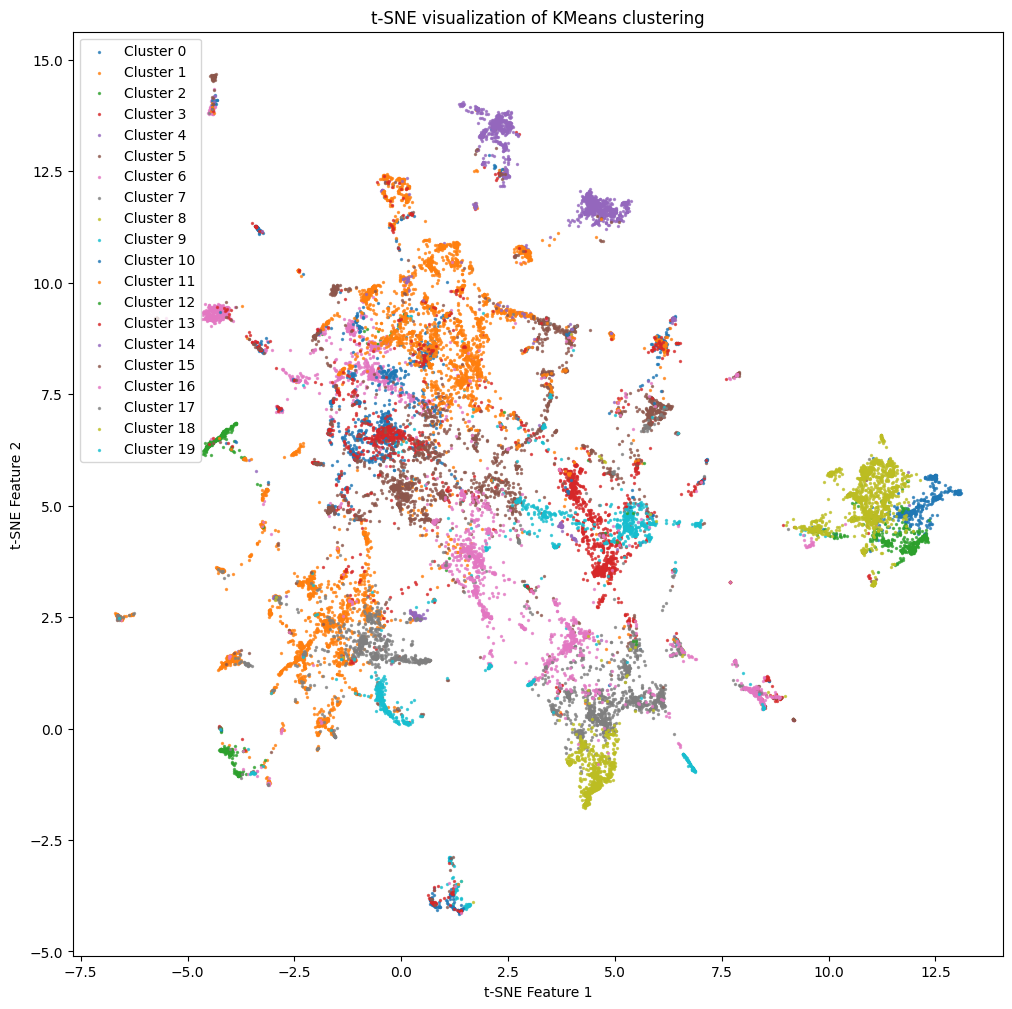

In [28]:
# 使用 t-SNE 进行降维
umap_model = umap.UMAP(n_components=2, metric='cosine')
umap_results = umap_model.fit_transform(embeddings)
# 可视化聚类结果
plt.figure(figsize=(12, 12))
for i in range(k):
    # 选择属于当前簇的点
    points = umap_results[labels == i]
    # 绘制这些点，并用不同的颜色进行区分
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}', s=2, alpha=0.7)

plt.title('t-SNE visualization of KMeans clustering')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

In [ ]:
# 为每个簇创建一个数据集列表
local_datasets = []
sampled_idxs = []
for i in range(10):
    # 找到属于当前簇的所有数据点索引
    cluster_indices = np.concatenate([np.where(labels == i)[0]],axis=None)
    # 从当前簇中随机采样 100 个数据点
    sampled_indices = np.random.choice(cluster_indices, size=min(100, len(cluster_indices)), replace=False)
    sampled_idxs.extend(sampled_indices)
    # 创建一个新的数据集，只包含采样的数据点
    dataset = processed_data[0].select(sampled_indices)
    # 将数据集添加到列表中
    local_datasets.append(dataset)

## 可视化不同client的base数据集

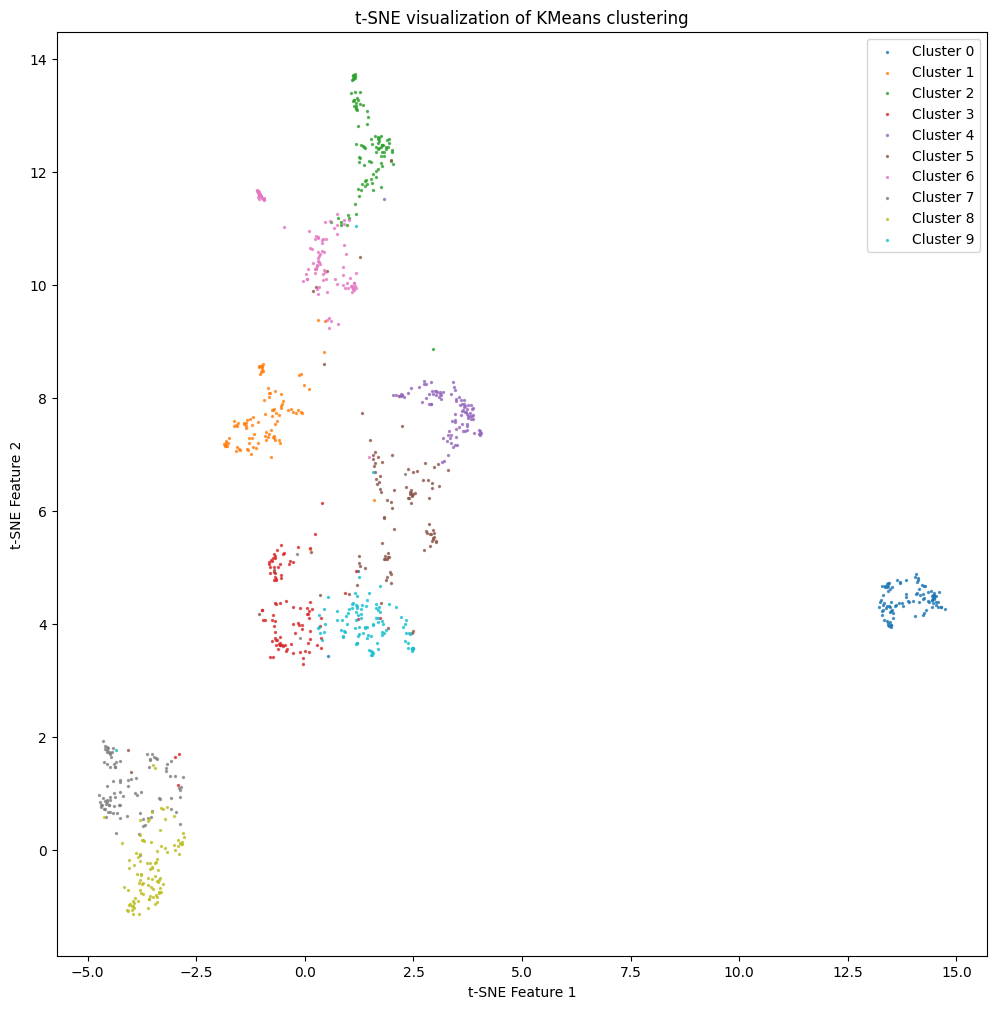

In [36]:
embeddings = []
labels = []
for i in range(10):
    embedding = model.encode(local_datasets[i]["instruction"])
    embeddings.extend(embedding)
    labels.extend([i]*len(embedding))

embeddings = np.array(embeddings)
labels = np.array(labels)
# 使用 t-SNE 进行降维
umap_model = umap.UMAP(n_components=2, metric='cosine')
umap_results = umap_model.fit_transform(embeddings)
# 可视化聚类结果
plt.figure(figsize=(12, 12))
for i in range(10):
    # 选择属于当前簇的点
    points = umap_results[labels == i]
    # 绘制这些点，并用不同的颜色进行区分
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}', s=2, alpha=0.7)

plt.title('t-SNE visualization of KMeans clustering')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

In [37]:
data_concated = concatenate_datasets(processed_data)
import numpy as np
import random
random.seed(10)
sampled_set = set(sampled_idxs)
base_set = set(range(len(data_concated)))
# 计算差集，即在 idx_set 中但不在 sampled_set 中的元素
remaining_idx = list(base_set - sampled_set)
print(len(remaining_idx))
data_concated = data_concated.select(remaining_idx)

406318


In [50]:
data_concated = data_concated.shuffle(seed=42)
public_datasets = []
for i in range(10):
    public_datasets.append(data_concated.shard(10,i))

## 对于niid，public 不分shard可能niid效果更好

In [40]:
concated_embeddings = model.encode(data_concated["instruction"])
concated_embeddings = torch.tensor(concated_embeddings, dtype=torch.float32)

Inference Embeddings: 100%|██████████| 199/199 [03:11<00:00,  1.04it/s]


In [43]:
client_pos_datasets = []
k = 10
for i, sampled_data in enumerate(local_datasets):
    sampled_embeddings = model.encode(sampled_data["instruction"])
    # 假设 embeddings 是你的嵌入数据
    kmeans = KMeans(n_clusters=k, random_state=0).fit(sampled_embeddings)
    clusters = torch.tensor(kmeans.cluster_centers_, dtype=torch.float32)
    similarity_scores = clusters @ concated_embeddings.T
    top_idxs = []
    for j in range(similarity_scores.shape[0]):
        tmp = similarity_scores[j]
        top_idxs.append(heapq.nlargest(500, range(len(tmp)-1), key=lambda x: tmp[x]))
        
    pos_datasets: Dataset = []
    top_idxs=np.concatenate(top_idxs,axis=None)
    pos_datasets = data_concated.select(top_idxs)
    pos_datasets = concatenate_datasets([pos_datasets, sampled_data])
    pos_datasets = pos_datasets.shuffle(seed=42)
    client_pos_datasets.append(pos_datasets)

## 尝试分shard

In [51]:
client_pos_datasets = []
k = 10
for i, sampled_data in enumerate(local_datasets):
    sampled_embeddings = model.encode(sampled_data["instruction"])
    # 假设 embeddings 是你的嵌入数据
    kmeans = KMeans(n_clusters=k, random_state=0).fit(sampled_embeddings)
    concated_embeddings = model.encode(public_datasets[i]["instruction"])
    clusters = torch.tensor(kmeans.cluster_centers_, dtype=torch.float32)
    concated_embeddings = torch.tensor(concated_embeddings, dtype=torch.float32)
    similarity_scores = clusters @ concated_embeddings.T
    top_idxs = []
    for j in range(similarity_scores.shape[0]):
        tmp = similarity_scores[j]
        top_idxs.append(heapq.nlargest(500, range(len(tmp)-1), key=lambda x: tmp[x]))
        
    pos_datasets: Dataset = []
    top_idxs=np.concatenate(top_idxs,axis=None)
    pos_datasets = public_datasets[i].select(top_idxs)
    pos_datasets = concatenate_datasets([pos_datasets, sampled_data])
    pos_datasets = pos_datasets.shuffle(seed=42)
    client_pos_datasets.append(pos_datasets)

Inference Embeddings: 100%|██████████| 20/20 [00:18<00:00,  1.07it/s]


In [52]:
for i, pos_data in enumerate(client_pos_datasets):
    pos_data.save_to_disk(f"/mnt/bn/data-tns-live-llm/leon/datasets/fed_data/niid_pos_sharded_{i}.parquet")

Saving the dataset (0/1 shards):   0%|          | 0/5100 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5100 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5100 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5100 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5100 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5100 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5100 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5100 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5100 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5100 [00:00<?, ? examples/s]